In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pp
import plotly.express as pex
df = pd.read_csv('E:/courses/ST443/group/US_Accidents_Dec20_updated.csv')

In [2]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
10,Number,69.000715
13,City,0.005475
16,Zipcode,0.061673
18,Timezone,0.151841
19,Airport_Code,0.280199
20,Weather_Timestamp,1.996222
21,Temperature(F),2.838469
22,Wind_Chill(F),29.637007
23,Humidity(%),3.001786
24,Pressure(in),2.392643


In [3]:
df = df.drop(['Number','Wind_Chill(F)'], axis=1)

In [4]:
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]
df = df.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

<AxesSubplot:>

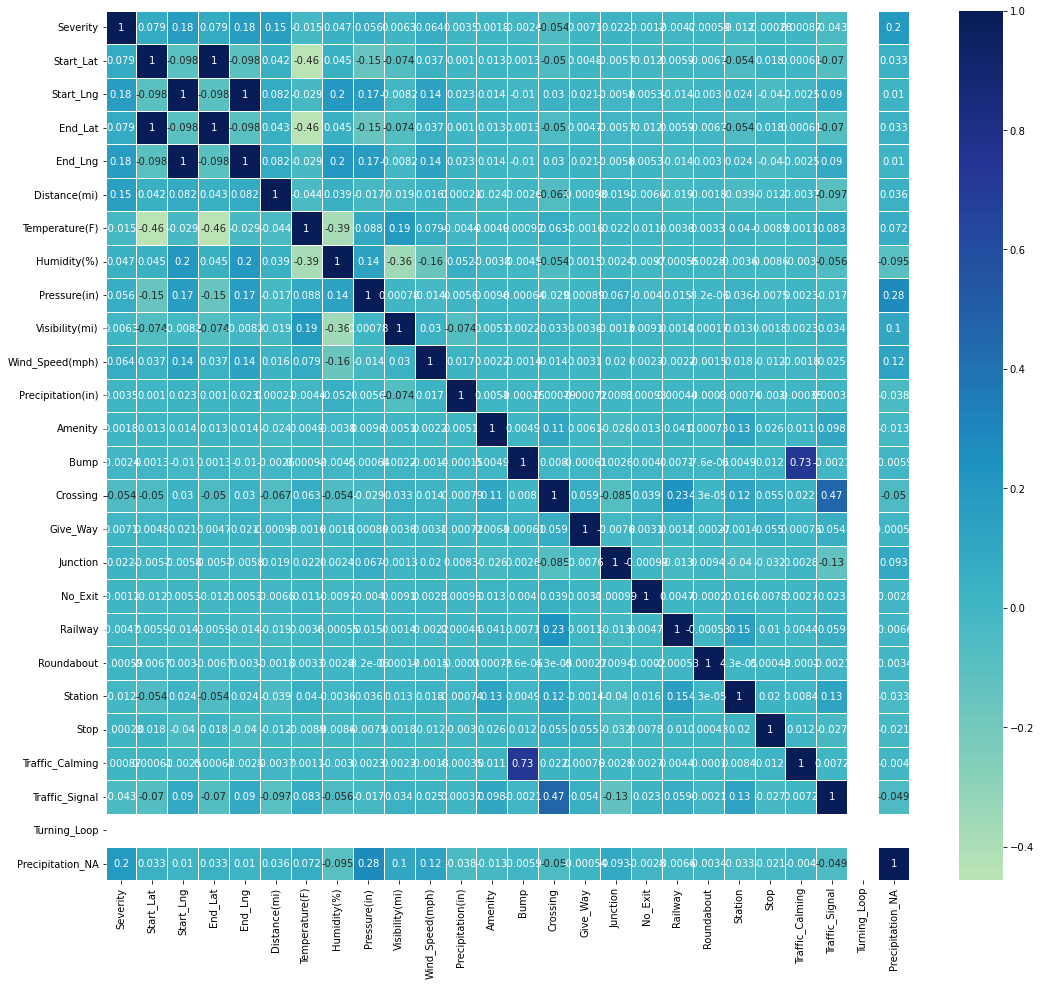

In [5]:
sb.set_palette('deep')
pp.figure(figsize = (18,16))
sb.heatmap(df.corr(),cmap = 'YlGnBu',annot = True,center = 0,linewidths=.6)

<AxesSubplot:>

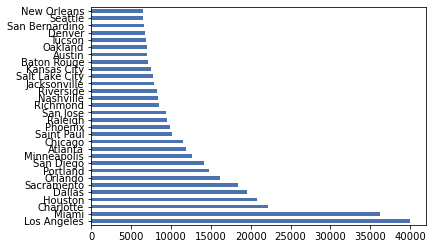

In [6]:
city_by_accident=df.City.value_counts()
city_by_accident[:30].plot(kind='barh')

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

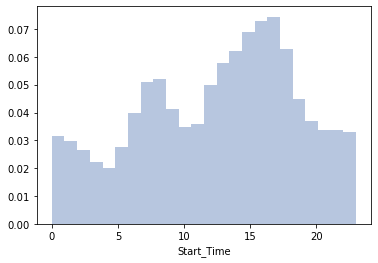

In [8]:
df.Start_Time = pd.to_datetime(df.Start_Time)
sb.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

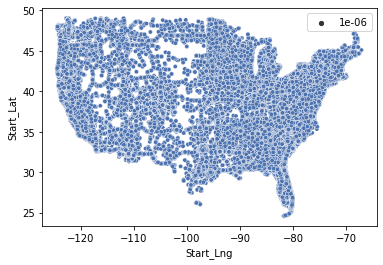

In [9]:
sb.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size = 0.000001)

In [10]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)
df.Severity4.value_counts()

0    1397696
1     114037
Name: Severity4, dtype: int64

In [11]:
df.State.value_counts()

CA    448511
FL    152687
OR     86462
TX     75126
NY     60881
MN     52313
NC     50158
VA     49503
PA     42830
IL     41706
MD     35102
UT     33000
GA     31111
AZ     30158
NJ     29848
SC     27876
MI     27775
WA     22990
OH     22042
TN     21872
CO     19786
LA     19242
MO     16947
CT     15192
IN     11731
AL      9374
WI      7917
MA      6121
KY      5671
OK      5592
KS      5146
IA      4779
AR      4367
ID      4061
NH      3823
RI      3766
DC      3752
NV      3674
MT      3293
WV      3242
MS      2787
DE      2331
ME      2194
NE      2178
NM      1466
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64